In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/classification/presidential_election_popular_vote/all_years.csv')

In [4]:
df.drop(columns = ['mode'], inplace=True)
df.columns

Index(['fips', 'totalvotes', 'dem', 'repub', 'other', 'pop_tot', 'pop_male',
       'pop_female', 'hispanic', 'labor_total', 'labor_armed',
       'labor_employed', 'labor_unemployed', 'income_median',
       'income_percapita', 'income_poverty', 'native_yes', 'native_no',
       'houses_tot', 'income_10', 'income_10-15', 'income_15-25', 'income_25',
       'marital_single', 'marital_married', 'marital_sepdiv', 'marital_widow',
       'edu_low', 'edu_mid', 'edu_high', 'edu_low_age_18', 'edu_low_age_45',
       'edu_low_age_65', 'edu_mid_age_18', 'edu_mid_age_45', 'edu_mid_age_65',
       'edu_high_age_18', 'edu_high_age_45', 'edu_high_age_65',
       'race_wht_total', 'race_wht_male', 'race_wht_female', 'race_blk_total',
       'race_blk_male', 'race_blk_female', 'race_other_total',
       'race_other_male', 'race_other_female', 'CENSUSAREA', 'pop_density',
       'year'],
      dtype='object')

In [5]:
df.sample(10)

,fips,totalvotes,dem,repub,other,pop_tot,pop_male,pop_female,hispanic,labor_total,...,race_wht_female,race_blk_total,race_blk_male,race_blk_female,race_other_total,race_other_male,race_other_female,CENSUSAREA,pop_density,year
9525,6095,205877,131639,69306,4932,450995,225302,225693,126198,229557.0,...,103500,59699,29677,30022,183721,91550,92171,906.234,497.658441,2020
11557,42061,22792,5445,17061,286,44123,23607,20516,931,19332.0,...,19668,2062,1920,142,2112,1406,706,889.262,49.617548,2020
4823,32011,808,107,663,38,1761,911,850,52,915.0,...,829,10,10,0,73,52,21,4179.941,0.421298,2012
504,13307,1111,515,588,8,2727,1270,1457,138,1226.0,...,877,935,537,398,260,78,182,209.118,13.040484,2008
1020,21125,22500,4618,17660,222,58155,28574,29581,714,25950.0,...,28842,490,256,234,1100,595,505,433.953,134.012209,2008
3381,8113,4256,2992,1154,110,7597,3999,3598,706,4846.0,...,3463,17,8,9,246,120,126,1288.581,5.895632,2012
10910,30059,1110,258,833,19,1948,1057,891,50,1037.0,...,854,1,1,0,148,111,37,2394.744,0.813448,2020
794,19081,5930,2805,3016,109,11505,5753,5752,367,6170.0,...,5515,14,9,5,470,238,232,571.005,20.148685,2008
5005,37089,52392,18642,32994,756,108642,52551,56091,10701,49306.0,...,50979,3476,1752,1724,5924,2536,3388,375.229,289.535191,2012
9197,54059,9510,1370,7911,229,24741,12024,12717,0,8261.0,...,12074,655,264,391,372,120,252,423.979,58.354305,2016


In [8]:
df['year'].value_counts()

year
2008    3106
2012    3106
2016    3106
2020    3106
Name: count, dtype: int64

#### Possibilities for splitting into train and test sets
1. Splits evenly across all 4 years (80\% train, 20\% test)
2. For each year, split into train and test sets (80\% train, 20\% test) while preserving the class distribution
3. Use 3 years as train sets, use the fourth as test set. 

In [15]:
df['winner'] = 0
indx = np.where(df['dem'] > df['repub'])[0].tolist()
df.loc[indx, 'winner'] = 1

In [16]:
df['winner'].value_counts()

winner
0    9855
1    2569
Name: count, dtype: int64

In [18]:
# add a column for probability of voting democrat
df['log_odd_dem_repub'] = np.log(df['dem'] / df['repub'])


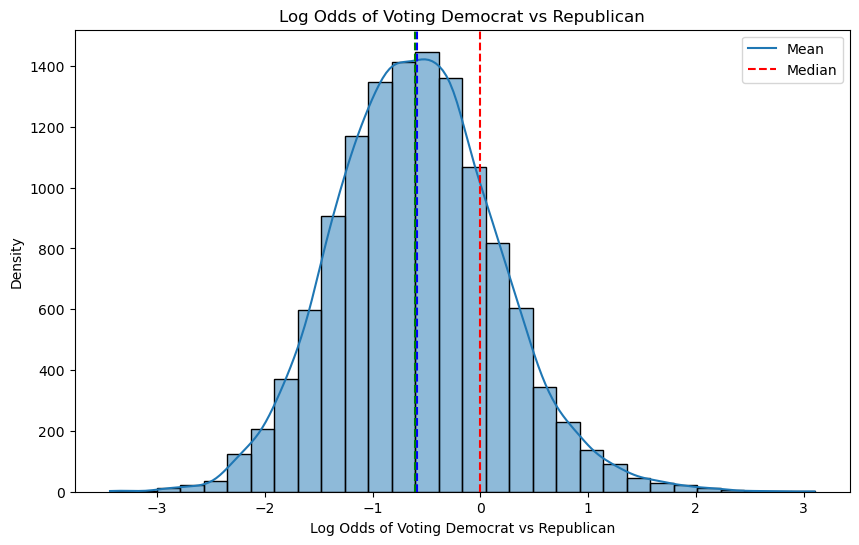

In [19]:
fig = plt.figure(figsize=(10, 6))

#plot histogram of log odds of dem vs repub
sns.histplot(df['log_odd_dem_repub'], bins=30, kde=True)
plt.title('Log Odds of Voting Democrat vs Republican')
plt.xlabel('Log Odds of Voting Democrat vs Republican')
plt.ylabel('Density')
plt.axvline(0, color='red', linestyle='--')
plt.axvline(df['log_odd_dem_repub'].mean(), color='blue', linestyle='--')
plt.axvline(df['log_odd_dem_repub'].median(), color='green', linestyle='--')
plt.legend({'Mean': df['log_odd_dem_repub'].mean(), 'Median': df['log_odd_dem_repub'].median()})
plt.show()

In [ ]:
# compute vote share of each county out of total votes

df['country_totalvotes'] = df.groupby(['year'])['totalvotes'].transform('sum')


In [22]:
df['country_totalvotes'].value_counts()

country_totalvotes
129082149    3106
127064331    3106
134417118    3106
156178393    3106
Name: count, dtype: int64

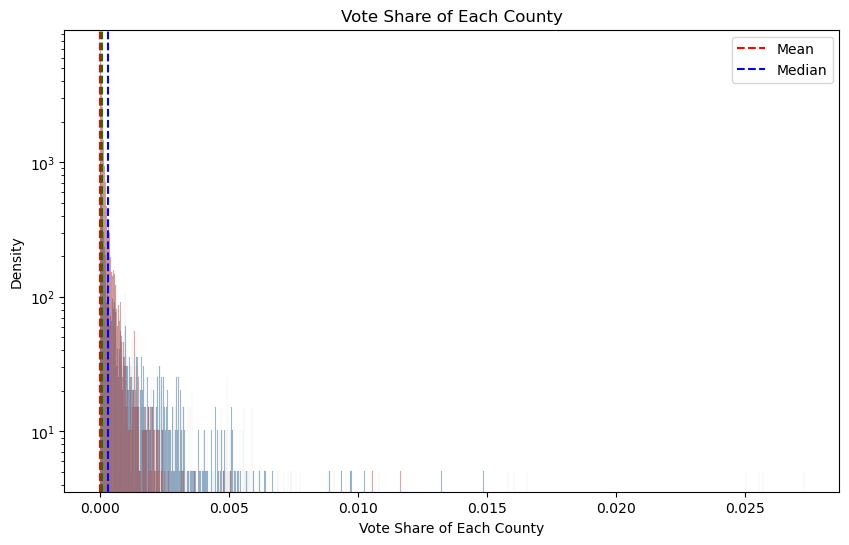

In [29]:
#compute the vote share of each county
from matplotlib.pyplot import yscale


df['vote_share'] = df['totalvotes'] / df['country_totalvotes']
palette = {1: "steelblue", 0: "indianred"}
fig = plt.figure(figsize=(10, 6))
#set yscale to log
plt.yscale('log')
#plot histogram of vote share
sns.histplot(data = df, 
             x='vote_share',
             stat='density',
             hue='winner', 
             palette=palette)
plt.title('Vote Share of Each County')
plt.xlabel('Vote Share of Each County')
plt.ylabel('Density')
plt.axvline(0, color='red', linestyle='--')
plt.axvline(df['vote_share'].mean(), color='blue', linestyle='--')
plt.axvline(df['vote_share'].median(), color='green', linestyle='--')
plt.legend({'Mean': df['vote_share'].mean(), 'Median': df['vote_share'].median()})
plt.show()

In [30]:
df_2008 = df[df['year'] == 2008]
df_2012 = df[df['year'] == 2012]
df_2016 = df[df['year'] == 2016]
df_2020 = df[df['year'] == 2020]

In [31]:
df_train = pd.concat([df_2008, df_2012, df_2016])
df_test = df_2020

In [32]:
df_train.columns

Index(['fips', 'totalvotes', 'dem', 'repub', 'other', 'pop_tot', 'pop_male',
       'pop_female', 'hispanic', 'labor_total', 'labor_armed',
       'labor_employed', 'labor_unemployed', 'income_median',
       'income_percapita', 'income_poverty', 'native_yes', 'native_no',
       'houses_tot', 'income_10', 'income_10-15', 'income_15-25', 'income_25',
       'marital_single', 'marital_married', 'marital_sepdiv', 'marital_widow',
       'edu_low', 'edu_mid', 'edu_high', 'edu_low_age_18', 'edu_low_age_45',
       'edu_low_age_65', 'edu_mid_age_18', 'edu_mid_age_45', 'edu_mid_age_65',
       'edu_high_age_18', 'edu_high_age_45', 'edu_high_age_65',
       'race_wht_total', 'race_wht_male', 'race_wht_female', 'race_blk_total',
       'race_blk_male', 'race_blk_female', 'race_other_total',
       'race_other_male', 'race_other_female', 'CENSUSAREA', 'pop_density',
       'year', 'winner', 'prob_dem', 'prob_repub', 'log_odd_dem_repub',
       'country_totalvotes', 'vote_share'],
      dtype='o

In [ ]:
features = ['pop_tot','hispanic', 'labor_armed',
       'labor_employed', 'labor_unemployed',  'income_poverty', 'native_yes', 
       'houses_tot', 'income_10', 'income_10-15', 'income_15-25', 'income_25',
       'marital_single', 'marital_married', 'marital_sepdiv', 'marital_widow', 'edu_low_age_18', 'edu_low_age_45',
       'edu_low_age_65', 'edu_mid_age_18', 'edu_mid_age_45', 'edu_mid_age_65',
       'edu_high_age_18', 'edu_high_age_45', 'edu_high_age_65', 'race_wht_male', 'race_wht_female', 
       'race_blk_male', 'race_blk_female', 
       'race_other_male', 'race_other_female']

In [34]:
X_train = df_train[features]
X_test = df_test[features]

In [37]:
X_train.shape, X_test.shape

((9318, 35), (3106, 35))

In [35]:
target = 'dem'
y_train = df_train[target]
y_test = df_test[target]

In [36]:
#run a linear regression model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('Train MSE:', mean_squared_error(y_train, y_train_pred))
print('Test MSE:', mean_squared_error(y_test, y_test_pred))

Train MSE: 77084556.58435394
Test MSE: 184140121.14516467


In [39]:
features = ['CENSUSAREA', 'pop_density','hispanic', 'labor_armed',
       'labor_employed', 'labor_unemployed',  'income_poverty', 'native_yes', 
       'houses_tot', 'income_10', 'income_10-15', 'income_15-25', 'income_25',
       'marital_single', 'marital_married', 'marital_sepdiv', 'marital_widow', 'edu_low_age_18', 'edu_low_age_45', 'income_percapita',
       'edu_low_age_65', 'edu_mid_age_18', 'edu_mid_age_45', 'edu_mid_age_65',
       'edu_high_age_18', 'edu_high_age_45', 'edu_high_age_65', 'race_wht_male', 'race_wht_female', 
       'race_blk_male', 'race_blk_female', 
       'race_other_male', 'race_other_female']

In [40]:
from sklearn.preprocessing import StandardScaler

X_train = df_train[features]
X_test = df_test[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_scaled, y_train)
y_train_pred2 = model2.predict(X_train_scaled)
y_test_pred2 = model2.predict(X_test_scaled)
print('Train MSE:', mean_squared_error(y_train, y_train_pred2))
print('Test MSE:', mean_squared_error(y_test, y_test_pred2))

Train MSE: 77254770.8960043
Test MSE: 184194305.86047572


In [41]:
# logistic regression model to predict 'winner'

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

X_train = df_train[features]
X_test = df_test[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = df_train['winner']
y_test = df_test['winner']

model3 = LogisticRegression()
model3.fit(X_train_scaled, y_train)
y_train_pred3 = model3.predict(X_train_scaled)
y_test_pred3 = model3.predict(X_test_scaled)
print('Binary Cross Entropy Train Loss:', log_loss(y_train, y_train_pred3))
print('Binary Cross Entropy Test Loss:', log_loss(y_test, y_test_pred3))

Binary Cross Entropy Train Loss: 5.724898799730992
Binary Cross Entropy Test Loss: 4.0151655095410606


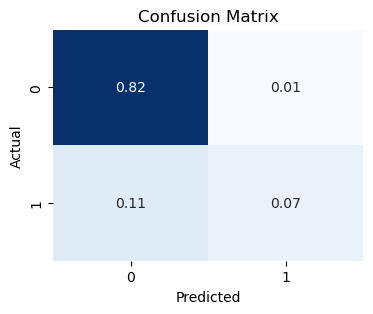

In [47]:
#visualize the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred3, normalize='all')

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()

In [48]:
df_train['winner'].value_counts(normalize=True)

winner
0    0.781391
1    0.218609
Name: proportion, dtype: float64

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define the MLP model with one hidden layer
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        # Hidden layer with 20 neurons
        self.hidden = nn.Linear(input_dim, 20)
        # Output layer: single neuron for binary classification
        self.output = nn.Linear(20, 1)

    def forward(self, x):
        # Apply ReLU activation to the hidden layer output
        x = F.relu(self.hidden(x))
        # Sigmoid activation for binary probability output
        x = torch.sigmoid(self.output(x))
        return x

# Training loop example
def train_model(model, 
                X_train, 
                y_train,optimizer, 
                criterion=nn.BCELoss(), 
                num_epochs=100):
    model.train() #set it in training mode
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(X_train)
        # Compute loss. Note: squeeze output when using BCELoss.
        loss = criterion(outputs.squeeze(), y_train.float())
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()

        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# --- Example Usage ---

import numpy as np



# Convert numpy arrays to torch tensors
X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train_np, dtype=torch.float32)
X_test = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test = torch.tensor(y_test_np, dtype=torch.float32)

# check the shape of the tensors
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([9318, 33]) torch.Size([9318])
torch.Size([3106, 33]) torch.Size([3106])


In [57]:
# Create the model, define the loss function and the optimizer
model = MLP(33)  # 33 input features
criterion = nn.BCELoss()  # Binary Cross Entropy loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [59]:
# Train the model
train_model(model, X_train, y_train, optimizer, criterion, num_epochs=100)

Epoch [10/100], Loss: 0.6332
Epoch [20/100], Loss: 0.6142
Epoch [30/100], Loss: 0.5965
Epoch [40/100], Loss: 0.5774
Epoch [50/100], Loss: 0.5575
Epoch [60/100], Loss: 0.5375
Epoch [70/100], Loss: 0.5185
Epoch [80/100], Loss: 0.5015
Epoch [90/100], Loss: 0.4877
Epoch [100/100], Loss: 0.4778
